# 2️⃣ Exploratory Data Analysis (EDA)
**designed by:** [datamover.ai](https://www.datamover.ai)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

**1 Load train set and sample the dataset to a manageable size if necessary**

In [2]:
data = pd.read_csv("./data_train.csv")
data.head(3)

,Income,Age,Workclass,final weight,Education,Education-Num,Marital Status,Occupation,Relationship,Ethnic group,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,>50K,25,Private,75759,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,44,United-States
1,>50K,59,Self-emp-not-inc,357943,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
2,<=50K,57,Private,210688,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,15,United-States


**2. For supervised learning tasks, identify the target attribute(s)**

In [70]:
TARGET = "Income"

**3 Study each attribute and its characteristics:**

**3 a. Name**

In [3]:
data.columns

Index(['Income', 'Age', 'Workclass', 'final weight', 'Education',
       'Education-Num', 'Marital Status', 'Occupation', 'Relationship',
       'Ethnic group', 'Sex', 'Capital Gain', 'Capital Loss', 'Hours per week',
       'Country'],
      dtype='object')

**3 b. For tabular data, define the data type of each variable, namely:**

- `Nominal`: Named categories, e.g., `gender : ['Female', 'Male']`
- `Ordinal`: Categories with an implied order, e.g. `quality : [Low, Medium, High]`
- `Discrete`: Only particular numbers, e.g., `age: {1,2,3,...,58,59,60}`
- `Continuous`: Any numerical value, e.g. `weight: {38.9,45.5}`
    
**Note 📝:** Nominal and ordinal data types are considered qualitative (categorical) features, whereas discrete and continuous data types are considered numerical (quantitative) features.

In [4]:
# wrap info in a dataframe
df_datatype = pd.DataFrame.from_dict(
    {
        "Income": "ordinal",  # <- This is our target
        "Age": "discrete",
        "Workclass": "nominal",
        "final weight": "numerical",  # Note: Not clear definition
        "Education": "nominal",
        "Education-Num": "ordinal",  # Note: we expect that 'Education-Num' gives the order to 'Education'
        "Marital Status": "nominal",
        "Occupation": "nominal",
        "Relationship": "nominal",
        "Ethnic group": "nominal",
        "Sex": "nominal",
        "Capital Gain": "numerical",
        "Capital Loss": "numerical",
        "Hours per week": "discrete",
        "Country": "nominal",
    },
    orient="index",
    columns=["data_type"],
)
display(df_datatype)

,data_type
Income,ordinal
Age,discrete
Workclass,nominal
final weight,numerical
Education,nominal
Education-Num,ordinal
Marital Status,nominal
Occupation,nominal
Relationship,nominal
Ethnic group,nominal


**3 c. Percentage of missing values, namely** `np.NaN` 
- [missingno](https://github.com/ResidentMario/missingno) can be a useful tool for visualization;
- make sure that missing values are encoded in a specific ways, e.g. `-1`, `"?"`


In [5]:
print(
    f"o {data.isna().sum().sum()} ({data.isna().sum().sum()/data.shape[0]*data.shape[1]:.2f}%) of missing values"
)

o 0 (0.00%) of missing values


Check if missing values are represented in a different way as in the description of the dataset it is stated that there are missing values.

In [6]:
# inspect one-by-one columns. It turns out that missing values are coded as " ?"
data["Occupation"].unique()

array([' Transport-moving', ' Exec-managerial', ' Prof-specialty',
       ' Craft-repair', ' Adm-clerical', ' Priv-house-serv',
       ' Machine-op-inspct', ' Other-service', ' Handlers-cleaners',
       ' Sales', ' Tech-support', ' ?', ' Farming-fishing',
       ' Protective-serv', ' Armed-Forces'], dtype=object)

In [7]:
# replace " ?" with np.NaN
_ = data.replace(to_replace=" ?", value=np.nan, inplace=True)

In [8]:
print(
    f"o {data.isna().sum().sum()} ({data.isna().sum().sum()/data.shape[0]*data.shape[1]:.2f}%) of missing values"
)

o 3386 (1.95%) of missing values


In [66]:
# store info as a dataframe
df_missing_value = data.isna().sum().to_frame(name="missing values")
display(df_missing_value)

,missing values
Income,0
Age,0
Workclass,1457
final weight,0
Education,0
Education-Num,0
Marital Status,0
Occupation,1463
Relationship,0
Ethnic group,0


**3 d. Noisiness and type of noise e.g. stochastic, rounding errors, etc.** (might require business knowledge)


In [65]:
# Let us assume that we have noise-free features
df_type_noise = pd.DataFrame(
    data={"type of noise": len(data.columns) * ["noise-free"]}, index=data.columns
)

**3 e. Type of distribution (Gaussian, Poisson, etc.). Check [here](https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm) for common type of distributions**. 

It is recommended to visualize each feature  🕵️📊


In [11]:
# let's visualize the data per datatype
df_datatype["data_type"].unique()

array(['ordinal', 'discrete', 'nominal', 'numerical'], dtype=object)

Visualize **nominal** distributions

In [12]:
# get list with nominal features, only
list_nominal = df_datatype.loc[lambda x: x["data_type"] == "nominal"].index
print(list_nominal)
print(f"o {len(list_nominal)} nominal features")

Index(['Workclass', 'Education', 'Marital Status', 'Occupation',
       'Relationship', 'Ethnic group', 'Sex', 'Country'],
      dtype='object')
o 8 nominal features


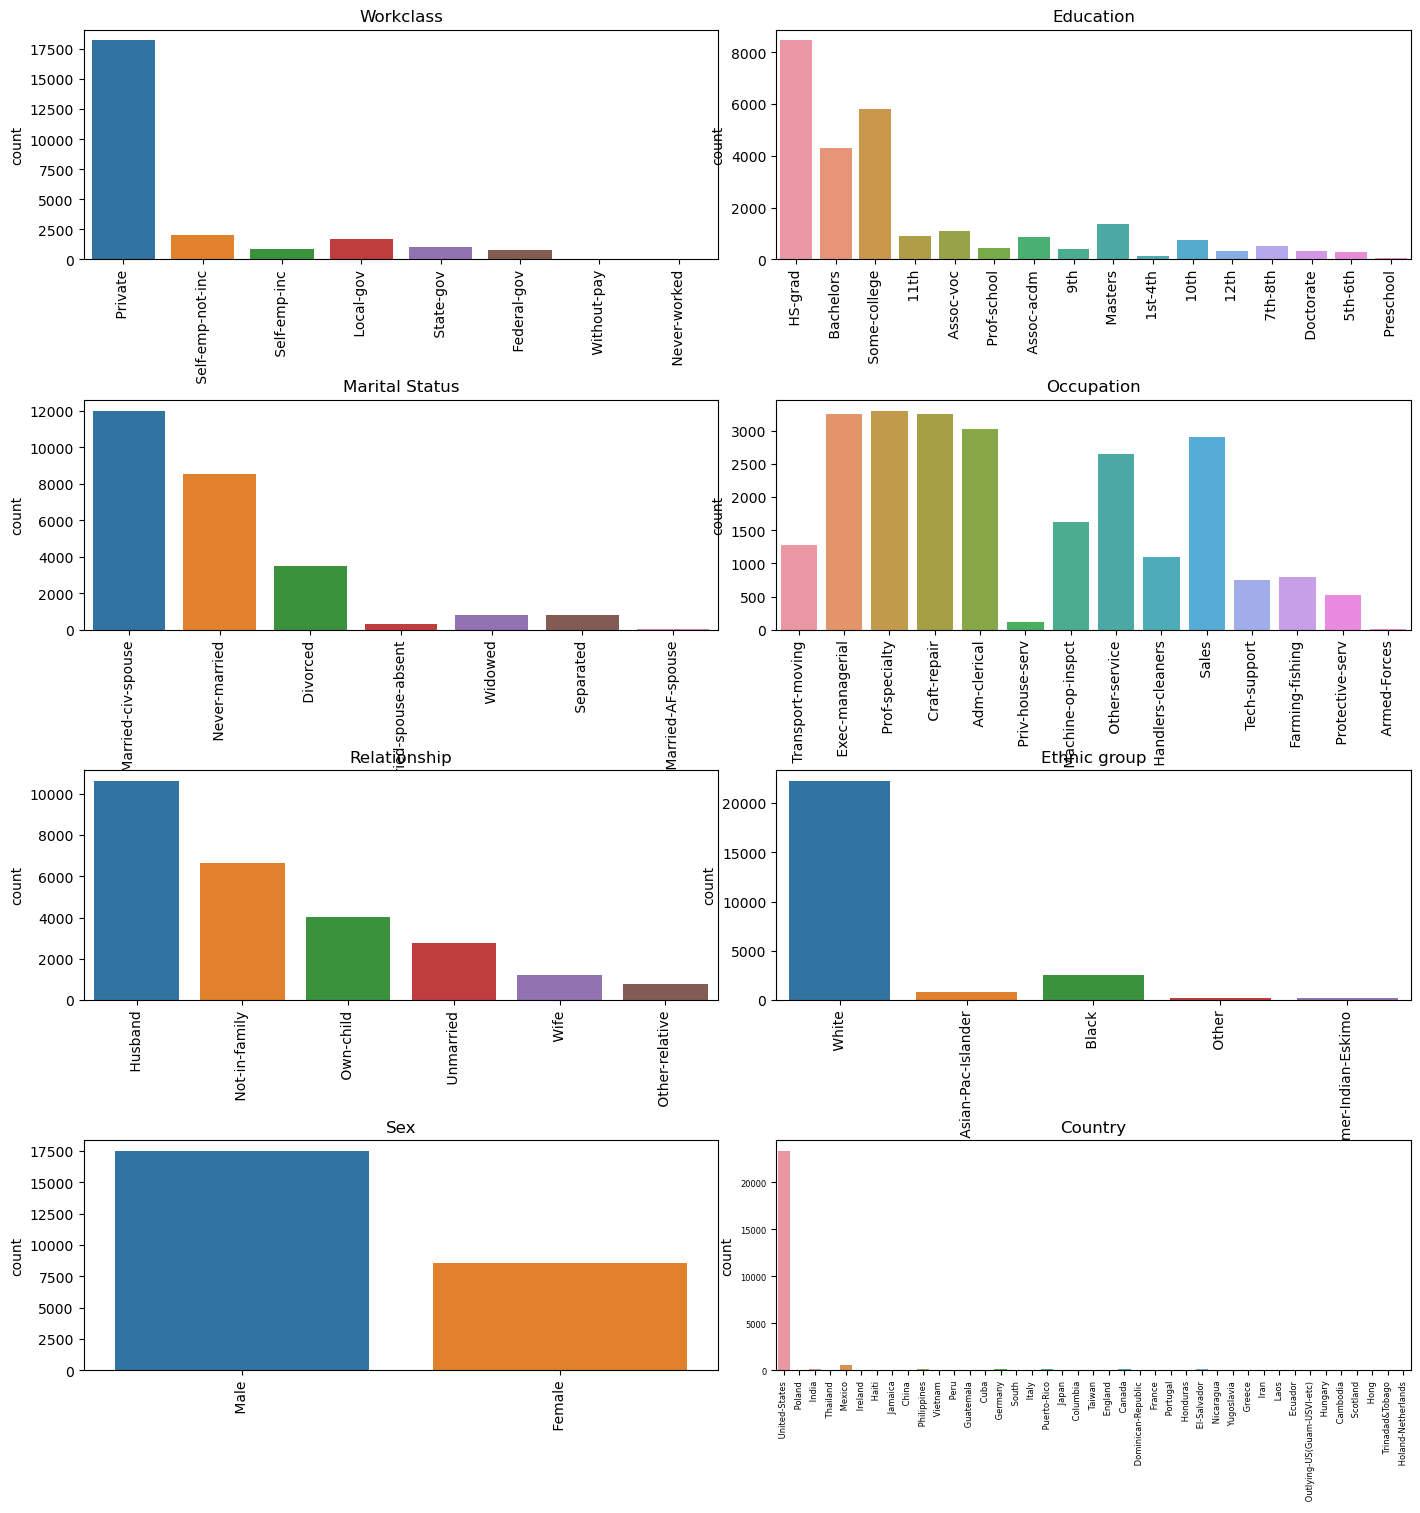

In [13]:
# create subplot with 9 plots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(14, 14))
fig.tight_layout(h_pad=8.0)

# loop through tickers and axes
k = 0
for i in range(0, axs.shape[0]):
    for j in range(0, axs.shape[1]):
        # ad-hoc way to plot countplot in subplot
        sns.countplot(data=data, x=list_nominal[k], ax=axs[i, j])

        # chart formatting
        axs[i, j].tick_params(axis="x", rotation=90)
        axs[i, j].set_title(list_nominal[k])
        axs[i, j].set_xlabel("")
        k += 1

plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

Visualize **ordinal** distributions

In [14]:
# get list with ordinal features, only
list_ordinal = df_datatype.loc[lambda x: x["data_type"] == "ordinal"].index
print(list_ordinal)
print(f"o {len(list_ordinal)} ordinal features")

Index(['Income', 'Education-Num'], dtype='object')
o 2 ordinal features


<Axes: xlabel='Education-Num', ylabel='Count'>

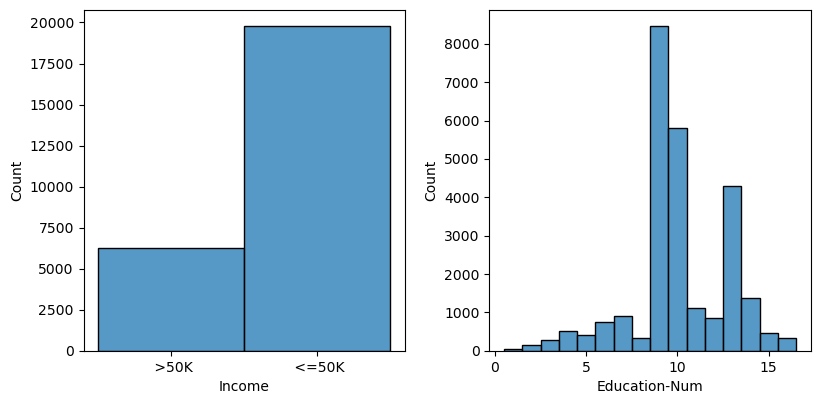

In [15]:
# create subplot with 9 plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
fig.tight_layout(w_pad=3.0)

sns.histplot(
    data=data, x=list_ordinal[0], binwidth=3, bins=40, discrete=True, ax=axs[0]
)
sns.histplot(
    data=data, x=list_ordinal[1], binwidth=3, bins=40, discrete=True, ax=axs[1]
)

Visualize **discrete** distributions

In [16]:
# get list with discrete features, only
list_discrete = df_datatype.loc[lambda x: x["data_type"] == "discrete"].index
print(list_discrete)
print(f"o {len(list_discrete)} discrete features")

Index(['Age', 'Hours per week'], dtype='object')
o 2 discrete features


<Axes: xlabel='Hours per week', ylabel='Count'>

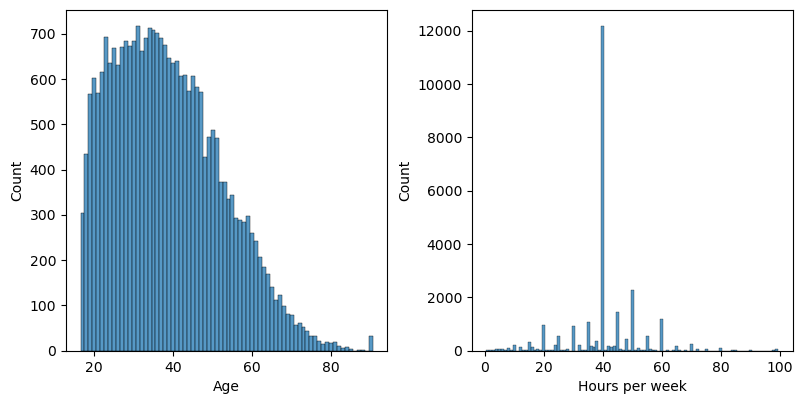

In [17]:
# create subplot with 9 plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
fig.tight_layout(w_pad=3.0)

sns.histplot(
    data=data, x=list_discrete[0], binwidth=3, bins=40, discrete=True, ax=axs[0]
)
sns.histplot(
    data=data, x=list_discrete[1], binwidth=3, bins=40, discrete=True, ax=axs[1]
)

Visualize **numerical** distributions

In [18]:
# get list with numerical features, only
list_numerical = df_datatype.loc[lambda x: x["data_type"] == "numerical"].index
print(list_numerical)
print(f"o {len(list_numerical)} discrete features")

Index(['final weight', 'Capital Gain', 'Capital Loss'], dtype='object')
o 3 discrete features


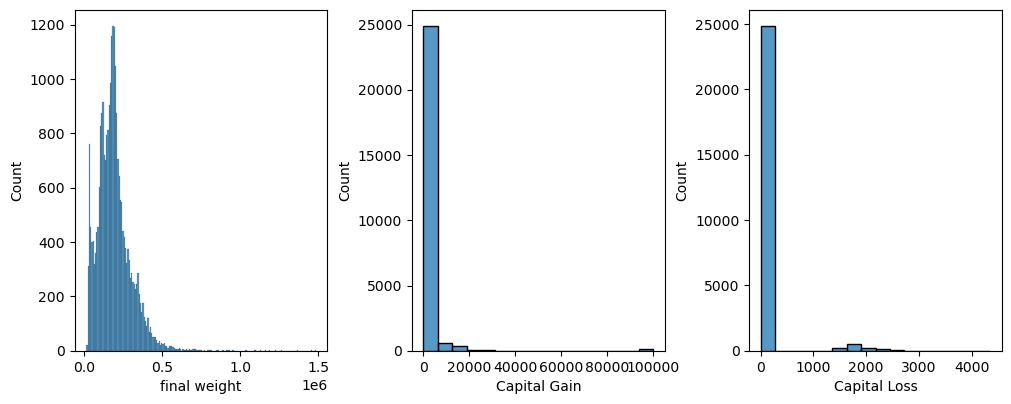

In [30]:
# create subplot with 9 plots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
fig.tight_layout(w_pad=3.0)

for i in range(0, axs.shape[0]):
    sns.histplot(data=data, x=list_numerical[i], discrete=False, ax=axs[i])

**3 f. Examine outliers for discrete and numerical features and check whether they make sense** (might require business knowledge);

Note 📝: A common way to identify outliers is by considering all $ \mathrm{samples} > 3 \cdot std$ (if you want to be more conservative you can consider $4 \cdot std$ as threshold).


In [61]:
# initialize empty dataframe
df_outlier = pd.DataFrame()

# select threshold between {3,4}
thr = 3

# generate summary of outlier
for feat in list(list_discrete) + list(list_numerical):
    df_outlier = pd.concat(
        [
            df_outlier,
            pd.DataFrame(
                data={
                    f"{thr}xstd": round(thr * data[feat].std(), 2),
                    f"n outlier ({thr}xstd)": data.loc[
                        lambda x: x[feat] > thr * x[feat].std(), feat
                    ].count(),
                    f"% outlier ({thr}xstd)": str(
                        round(
                            data.loc[
                                lambda x: x[feat] > thr * x[feat].std(), feat
                            ].count()
                            / data.shape[0],
                            2,
                        )
                        * 100
                    )
                    + "%",
                },
                index=[feat],
            ),
        ]
    )

display(df_outlier)

,3xstd,n outlier (3xstd),% outlier (3xstd)
Age,40.95,10770,41.0%
Hours per week,37.10,20271,78.0%
final weight,317640.46,2940,11.0%
Capital Gain,21591.62,166,1.0%
Capital Loss,1215.19,1192,5.0%


**EDA summary**

4. Annotate all information from EDA, e.g.
    - type of data;
    - if there are missing values and how to deal with them;
    - the ratio of facets for categorical features;
    - the type of distribution;  
    - Identify the promising transformations you may want to apply (e.g. log-transformation for highly skewed distribution and\or cluster facets to mitigate group imbalance);
5. Identify extra data that would be useful;
6. Document analysis and send to manager and/or customer.


In [67]:
# get summary table
df_datatype.join(df_missing_value).join(df_type_noise)

,data_type,missing values,type of noise
Income,ordinal,0,noise-free
Age,discrete,0,noise-free
Workclass,nominal,1457,noise-free
final weight,numerical,0,noise-free
Education,nominal,0,noise-free
Education-Num,ordinal,0,noise-free
Marital Status,nominal,0,noise-free
Occupation,nominal,1463,noise-free
Relationship,nominal,0,noise-free
Ethnic group,nominal,0,noise-free


In [68]:
df_datatype["data_type"].value_counts()

nominal      8
numerical    3
ordinal      2
discrete     2
Name: data_type, dtype: int64

In [79]:
# quantify target imbalance, absolute and percentage value
pd.concat(
    [data[TARGET].value_counts(), data[TARGET].value_counts(normalize=True)], axis=1
).round(2)

,Income,Income
<=50K,19775,0.76
>50K,6273,0.24


Calculate [prevalence](https://www.nimh.nih.gov/health/statistics/what-is-prevalence) on target. In short, prevalence is the number of sample in the sample with the characteristic of interest (usually the minority class), divided by the total number of people in the sample.

In [86]:
print(
    f"Prevalence for Target:{TARGET} = {data.loc[lambda x:x[TARGET]==' >50K'].shape[0]/data.shape[0]:.2f}"
)

Prevalence for Target:Income = 0.24


In [90]:
# check if education and Education num have the same amount of element, and if they they probably can be combined
print(len(data["Education"].unique()))
print(len(data["Education-Num"].unique()))

16
16


**Summary**

- Target: `Income` with a prevalence 0.24;
- There are 8 nominal, 3 numerical, 2 ordinal and 2 discrete features;
- There are 3386 (1.95%) missing values and they are encoded as ` ?`;
- All Nominal features are highly imbalanced with several facets. It is expected to cluster some of the facets in order to create a more predictive feature.
- `Education-Num` have the same amount of elements (16); hence it is assumed that it provides the order to `Education`; we can apply some feature engineering procedures which combine both features leading to an ordinal feature. Furthermore, education has a spike at values 9 and 10;
- `Age` and `final weight` are heavy-tailed; hence we expect to apply a log transformation in order to normalise the features;
- `Hours per week` have a significant spike at 40. We can consider converting this feature from an ordinal feature with 3 facets, namely:
    - `part-time` for `Hours per week < 40`
    - `full-time` for `Hours per week = 40`
    - `Freelancers or entrepreneurs` for `Hours per week > 40`
- `Capital Gain` and `Capital Loss` have extreme values, and at the same time, the majority of the sample is 0 (hence very low variance. It is not clear whether these features can be predictive. 